In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('C:/Users/2002l/Downloads/spam.csv')

In [30]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [31]:
df['is_spam'] = df.Category.apply(lambda x: 1 if x == 'spam' else 0)

In [32]:
df.head()

,Category,Message,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Since the message is in textual form: it can be changed by using
1. using CountVectorizer 
2. using pipeline

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.is_spam, test_size = 0.2)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer()

In [36]:
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [38]:
model.fit(x_train_count, y_train)

MultinomialNB()

In [39]:
x_test_count = cv.transform(x_test)
x_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
y_predicted = model.predict(x_test_count)

In [44]:
model.score(x_test_count, y_test)

0.9847533632286996

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

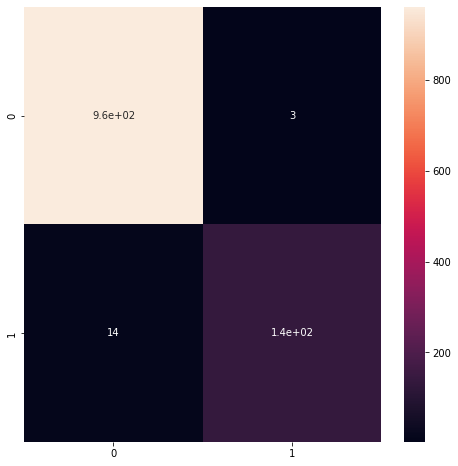

In [47]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (8,8))
plt.xlabel("Predicted")
plt.ylabel("True")
sb.heatmap(cm, annot = True)